<a href="https://colab.research.google.com/github/Mund99/DSUB_5.0/blob/main/Project/Telco_Customer_Churn_Rate_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telco Customer Churn Rate Prediction**
---
**Business Questions**

---
Based on the telco dataset, predict if an individual customer will churn or not. Side question will be which features (the pain points) actually drive customer churn.  

In [38]:
# Import Libraries
import pandas as pd 
import seaborn as sns 

## **Obtain Data**

In [39]:
df = pd.read_csv("https://raw.githubusercontent.com/Mund99/DSUB_5.0/main/Dataset/telco_customer_churn_dataset.csv")
df.shape

(7043, 21)

In [40]:
# Observe the features and first 10 rows of the data frame.  
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## **Scrub Data**

In [41]:
# Print a concise summary of the data frame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [42]:
# From the df.info, the total charges suspose to be dtype of float or int.
# Hence, need to convert to numeric data type, "coerce" means setting the non number to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [44]:
# Loop through the columns to get the unique values per column
for i in df.columns: 
  print(f"Unique {i}'s count: {df[i].nunique()}")
  print(f"{df[i].unique()}\n")

Unique customerID's count: 7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique gender's count: 2
['Female' 'Male']

Unique SeniorCitizen's count: 2
[0 1]

Unique Partner's count: 2
['Yes' 'No']

Unique Dependents's count: 2
['No' 'Yes']

Unique tenure's count: 73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique PhoneService's count: 2
['No' 'Yes']

Unique MultipleLines's count: 3
['No phone service' 'No' 'Yes']

Unique InternetService's count: 3
['DSL' 'Fiber optic' 'No']

Unique OnlineSecurity's count: 3
['No' 'Yes' 'No internet service']

Unique OnlineBackup's count: 3
['Yes' 'No' 'No internet service']

Unique DeviceProtection's count: 3
['No' 'Yes' 'No internet service']

Unique TechSupport's count: 3
['No' 'Yes' 'No internet service']

Unique StreamingTV's

In [45]:
# Setting the binary value - (No -> 0) and (Yes -> 1)
binary_columns = ["Partner", "PhoneService", "Dependents", "PaperlessBilling", "Churn"]

for column in binary_columns:
  df[column] = df[column].map({"No": 0, "Yes": 1})

In [46]:
# Setting the nominal value to binary value according to the type 
df['gender'] = df['gender'].map({"Female": 0, "Male": 1})

In [47]:
df['MultipleLines'] = df['MultipleLines'].map({"No": 0, "Yes": 1, "No phone service":0})

In [48]:
columns = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies" ]

for column in columns: 
  df[column] = df[column].map({"No": 0, "Yes": 1, "No internet service":0})

In [49]:
# As the nominal value for 'Internet Service' is unique hence cannot simply set 0 or 1 
# need to separate the nominal data into individual column and set to binary value 
df = pd.get_dummies(data=df, columns=['InternetService'])

In [50]:
# Loop through the columns to get the unique values per column
for i in df.columns: 
  print(f"Unique {i}'s count: {df[i].nunique()}")
  print(f"{df[i].unique()}\n")

Unique customerID's count: 7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique gender's count: 2
[0 1]

Unique SeniorCitizen's count: 2
[0 1]

Unique Partner's count: 2
[1 0]

Unique Dependents's count: 2
[0 1]

Unique tenure's count: 73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique PhoneService's count: 2
[0 1]

Unique MultipleLines's count: 2
[0 1]

Unique OnlineSecurity's count: 2
[0 1]

Unique OnlineBackup's count: 2
[1 0]

Unique DeviceProtection's count: 2
[0 1]

Unique TechSupport's count: 2
[0 1]

Unique StreamingTV's count: 2
[0 1]

Unique StreamingMovies's count: 2
[0 1]

Unique Contract's count: 3
['Month-to-month' 'One year' 'Two year']

Unique PaperlessBilling's count: 2
[1 0]

Unique PaymentMethod's count: 4
['Electronic check' 'Mailed check' '

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customerID                   7043 non-null   object 
 1   gender                       7043 non-null   int64  
 2   SeniorCitizen                7043 non-null   int64  
 3   Partner                      7043 non-null   int64  
 4   Dependents                   7043 non-null   int64  
 5   tenure                       7043 non-null   int64  
 6   PhoneService                 7043 non-null   int64  
 7   MultipleLines                7043 non-null   int64  
 8   OnlineSecurity               7043 non-null   int64  
 9   OnlineBackup                 7043 non-null   int64  
 10  DeviceProtection             7043 non-null   int64  
 11  TechSupport                  7043 non-null   int64  
 12  StreamingTV                  7043 non-null   int64  
 13  StreamingMovies   

In [52]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,0,One year,0,Mailed check,56.95,1889.50,0,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,0


## **Explore Data**

In [53]:
# Check missing values 
df.isnull().sum()

customerID                      0
gender                          0
SeniorCitizen                   0
Partner                         0
Dependents                      0
tenure                          0
PhoneService                    0
MultipleLines                   0
OnlineSecurity                  0
OnlineBackup                    0
DeviceProtection                0
TechSupport                     0
StreamingTV                     0
StreamingMovies                 0
Contract                        0
PaperlessBilling                0
PaymentMethod                   0
MonthlyCharges                  0
TotalCharges                   11
Churn                           0
InternetService_DSL             0
InternetService_Fiber optic     0
InternetService_No              0
dtype: int64

In [54]:
df = df.dropna()  # Remove missing values

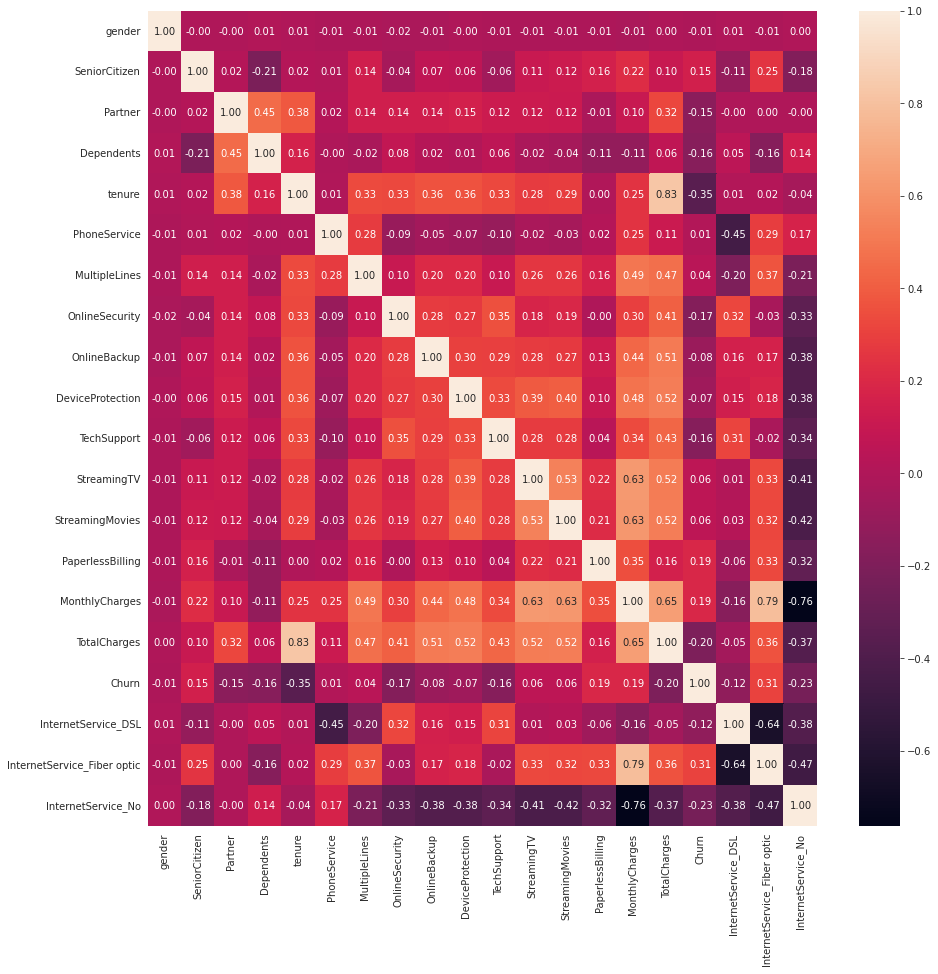

In [55]:
# Check the correlation 
sns.set({"figure.figsize": (15, 15)})

corr = df.corr()
sns.heatmap(corr, annot = True, fmt = ".2f")

**The target variable is Churn**
- It can be seen that the InternetService_FiberOptic has the highest correlation with the churn rate, this could be due to the price option. 
- Then it is paperless billing, monthly charges and senior citizen count where this three particular is positively correlated with the churn 
- and also it is worth to note that tenure is negatively correlated with the churn, this is because the higher the tenure the lesser the person will churn. As it also represent how long the person will commit to the telco.  

In [56]:
# Descriptive Analytic Summary
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,0.265785,0.343572,0.440273,0.216155
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,0.441782,0.474934,0.496455,0.411650
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000


For continuous data (tenure, monthly charges, total charges)
- the mean and median value shows that the total charges has a large different 
- notable large different on the 75% and max value for the total charges as well
- from the two points high number of outliers could be noticed on the total charges  

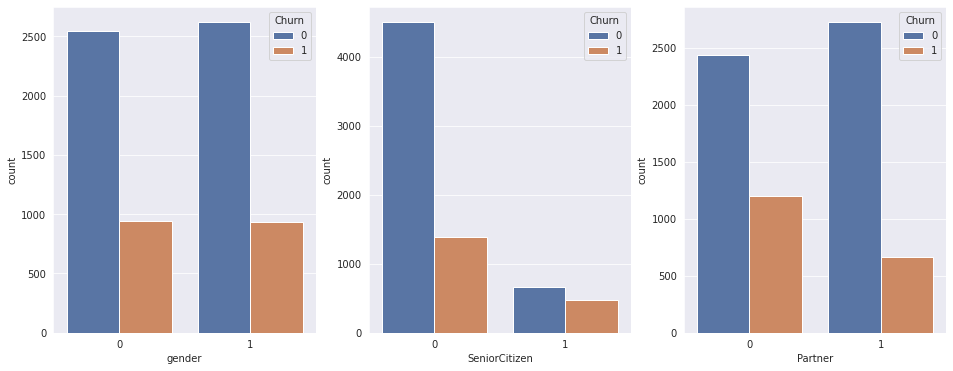

In [57]:
# Using the counterplot to observe the relationship of the variable correspond to the churn rate 
# while for continuous data will be using boxplot  
from matplotlib import pyplot as plt

main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x="gender", hue="Churn", ax=subplots[0])
sns.countplot(data=df, x="SeniorCitizen", hue="Churn", ax=subplots[1])
sns.countplot(data=df, x="Partner", hue="Churn", ax=subplots[2])

- The gender doesn't affect the churn 
- Senior citizen is much likely to churn (this could be due to the unadaptability / unwillingness to the new technology of smartphone and the Internet, hence churn to not using it. Besides, they would be mostly using landline communication too.)
- Citizen with partner is less likely to churn (as they would just stick with their existing family plan and package etc)

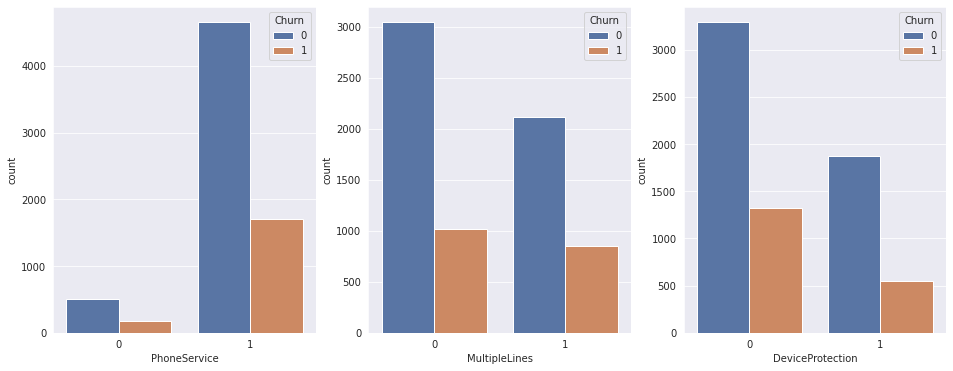

In [58]:
main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x="PhoneService", hue="Churn", ax=subplots[0])
sns.countplot(data=df, x="MultipleLines", hue="Churn", ax=subplots[1])
sns.countplot(data=df, x="DeviceProtection", hue="Churn", ax=subplots[2])

- The churn is higher when there is phone service provided
- The churn is higher when there is mulitple line provided  
- The churn is higher when there is no device protection provided  

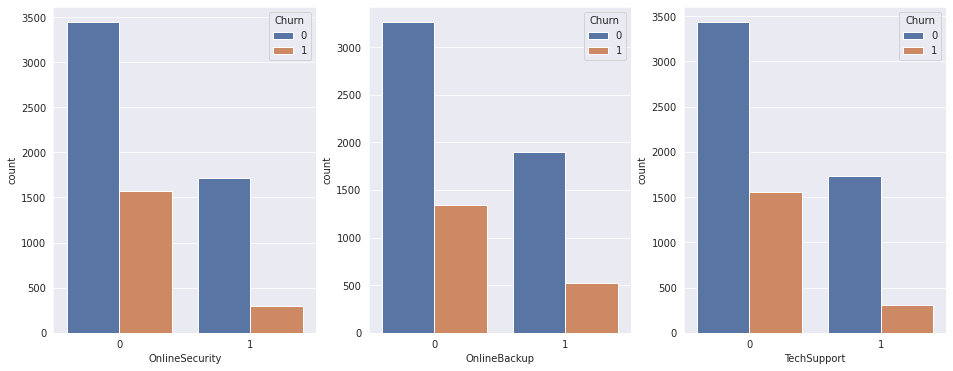

In [59]:
main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x="OnlineSecurity", hue="Churn", ax=subplots[0])
sns.countplot(data=df, x="OnlineBackup", hue="Churn", ax=subplots[1])
sns.countplot(data=df, x="TechSupport", hue="Churn", ax=subplots[2])

- The churn is higher when no online security is provided  
- The churn is higher when no online backup is provided 
- The churn is higher when no tech support is provided

- From the points above, it can see that people would more likely to churn when they are not subscribed to extra services. 

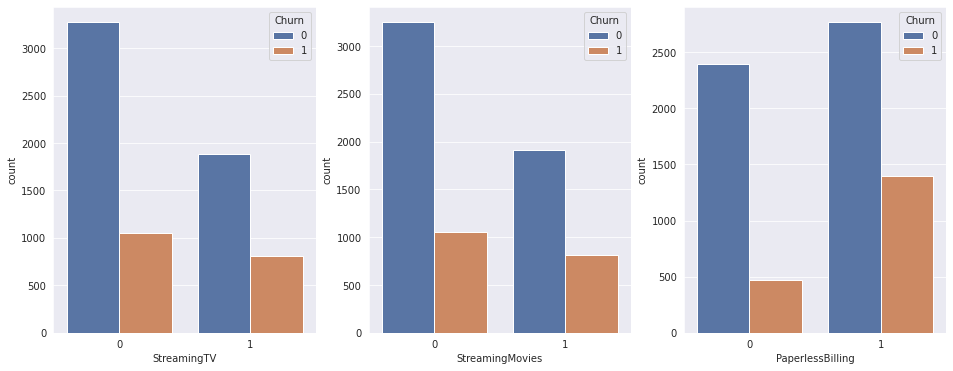

In [60]:
main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x="StreamingTV", hue="Churn", ax=subplots[0])
sns.countplot(data=df, x="StreamingMovies", hue="Churn", ax=subplots[1])
sns.countplot(data=df, x="PaperlessBilling", hue="Churn", ax=subplots[2])

- The churn for streaming TV and streaming movies is looking ok 
- The churn is higher when there is paperless billing (this is surprising)

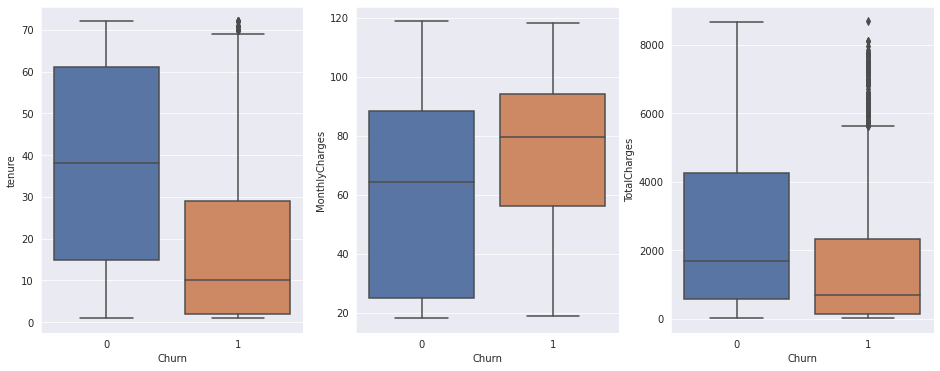

In [61]:
main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.boxplot(data=df, y="tenure", x="Churn", ax=subplots[0])
sns.boxplot(data=df, y="MonthlyCharges", x="Churn", ax=subplots[1])
sns.boxplot(data=df, y="TotalCharges", x="Churn", ax=subplots[2])

- Most customer churn happens at 10 months of the tenure 
- Customer with higher monthly charges are more likely to churn  
- However, the total charges shows a lower churn rate when the total charges is lower. 

## **Model Data**

In [62]:
# Build decision tree classifier 
# Listing the necessary dataset 
columns = ['SeniorCitizen', 'Partner', 'PhoneService', 'DeviceProtection', 'OnlineSecurity', 
           'OnlineBackup', 'TechSupport', 'PaperlessBilling', 'tenure', 'MonthlyCharges', 'TotalCharges' ]

In [63]:
train_data = df[columns]
train_labels = df['Churn']

In [64]:
# Split the data into train and test set 
# 70% of training data, 30% of testing data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.3, random_state=1)

In [65]:
# Build the decision tree classifier model 
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth = 3)
model.fit(train_data, train_labels)

DecisionTreeClassifier(max_depth=3)

In [66]:
# Check the accuracy performance of the model 
from sklearn import metrics
y_pred = model.predict(X_test)
print ("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.795260663507109


In [67]:
# Draw the decision tree using graphviz 
import graphviz
columns = list(train_data.columns)

dot_data = tree.export_graphviz(model, out_file=None, feature_names=columns, class_names=['No', 'Yes'] ,filled = True, rounded = True)

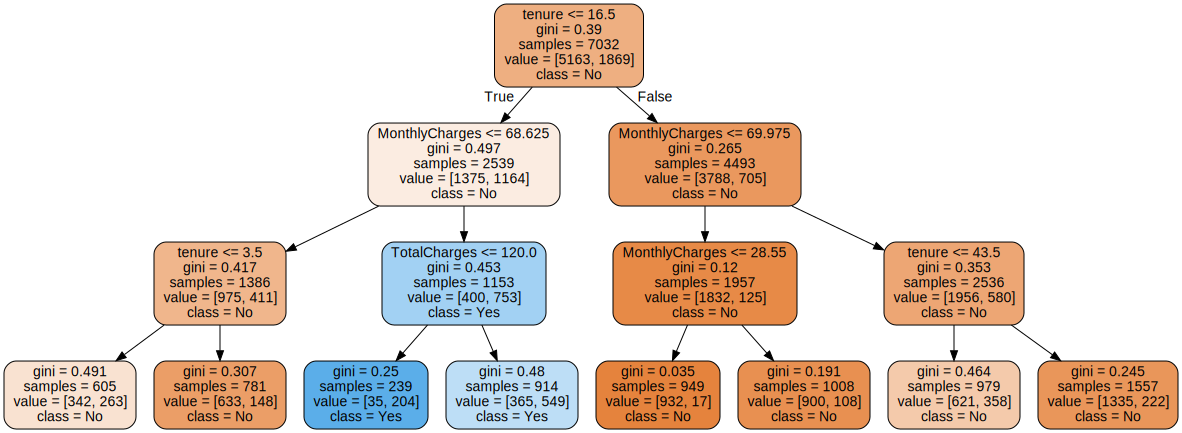

In [68]:
# Display the tree 
graph = graphviz.Source(dot_data)
graph

In [69]:
# Using the model to predict the churn according to the variables
df_predict = train_data.iloc[0:0].copy()

In [70]:
df_predict = df_predict.append({
    "SeniorCitizen": 0,
    "Partner":0,
    "PhoneService":1,
    "DeviceProtection": 1,
    "OnlineSecurity": 0,
    "OnlineBackup":0,
    "TechSupport":1,
    "PaperlessBilling":1,
    "tenure": 12,
    "MonthlyCharges":50,
    "TotalCharges":70
}, ignore_index=True)

In [71]:
df_predict

,SeniorCitizen,Partner,PhoneService,DeviceProtection,OnlineSecurity,OnlineBackup,TechSupport,PaperlessBilling,tenure,MonthlyCharges,TotalCharges
0,0,0,1,1,0,0,1,1,12,50.0,70.0


In [72]:
model.predict(df_predict)

array([0])

## **Improve The Model for Higher Accuracy**

In [73]:
columns = ['SeniorCitizen', 'Partner', 'PhoneService', 'DeviceProtection', 'OnlineSecurity', 
           'OnlineBackup', 'TechSupport', 'PaperlessBilling', 'tenure', 'MonthlyCharges', 'TotalCharges' ]

train_data = df[columns]
train_labels = df['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.3, random_state=1)

model = tree.DecisionTreeClassifier(max_depth = 5)
model.fit(train_data, train_labels)

y_pred = model.predict(X_test)
print ("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8023696682464455


- Adjusted the max_depth of the tree from 3 to 35 
- The accuracy improved to 0.80 = 80% 

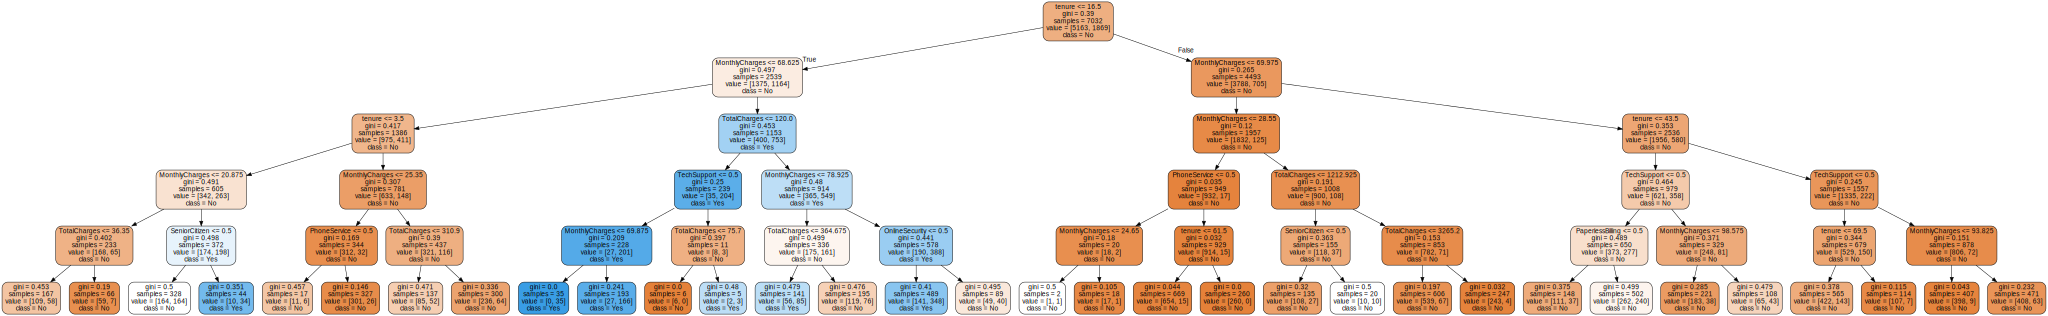

In [74]:
columns = list(train_data.columns)

dot_data = tree.export_graphviz(model, out_file=None, feature_names=columns, class_names=['No', 'Yes'] ,filled = True, rounded = True)

graph = graphviz.Source(dot_data)
graph